In [1]:
# ============================================
# CELL 1: Import necessary libraries
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
# ============================================
# CELL 2: Load dataset
# ============================================

# Load your preprocessed dataset (the one with one-hot encoded features)
df = pd.read_csv(r'D:\Project DS Final\check\flight_dep_linear.csv')

# Display basic info
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False).head())


Shape of dataset: (50029, 124)

Columns:
 ['DAY_OF_MONTH', 'CRS_ELAPSED_TIME', 'DISTANCE', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlyVisibility', 'HourlyWindSpeed', 'DEP_HOUR_sin', 'DEP_HOUR_cos', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'DAY_OF_WEEK_1', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'OP_UNIQUE_CARRIER_AA', 'OP_UNIQUE_CARRIER_AS', 'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_DL', 'OP_UNIQUE_CARRIER_F9', 'OP_UNIQUE_CARRIER_G4', 'OP_UNIQUE_CARRIER_HA', 'OP_UNIQUE_CARRIER_MQ', 'OP_UNIQUE_CARRIER_NK', 'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_UA', 'OP_UNIQUE_CARRIER_WN', 'ORIGIN_BLI', 'ORIGIN_GEG', 'ORIGIN_PAE', 'ORIGIN_PSC', 'ORIGIN_SEA', 'DEST_ABQ', 'DEST_ANC', 'DEST_ATL', 'DEST_AUS', 'DEST_AZA', 'DEST_BLI', 'DEST_BNA', 'DEST_BOI', 'DEST_BOS', 'DEST_BUR', 'DEST_BWI', 'DEST_BZN', 'DEST_CHS', 'DEST_CLE', 'DEST_CLT', 'DEST_CMH', 'DEST_CVG', 'DEST_DAL', 'DEST_DCA', 'DEST_DEN', 'DEST

In [5]:
# ============================================
# CELL 3: Define features and target variable
# ============================================

# Define target variable
target = 'DEP_DELAY'

# Define feature matrix (drop target)
X = df.drop(columns=[target])
y = df[target]

print("Number of features:", X.shape[1])
print("Target variable:", target)


Number of features: 123
Target variable: DEP_DELAY


In [6]:
# ============================================
# CELL 4: Identify numeric features for scaling
# ============================================

numeric_features = [
    'CRS_ELAPSED_TIME', 'DISTANCE',
    'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
    'HourlyRelativeHumidity', 'HourlyVisibility', 'HourlyWindSpeed'
]

print("Numeric features to be scaled:\n", numeric_features)


Numeric features to be scaled:
 ['CRS_ELAPSED_TIME', 'DISTANCE', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlyVisibility', 'HourlyWindSpeed']


In [7]:
# ============================================
# CELL 5: Split train and test data
# ============================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (40023, 123)
Test set shape: (10006, 123)


In [8]:
# ============================================
# CELL 6: Apply StandardScaler to numeric features
# ============================================

scaler = StandardScaler()

# Fit on training data, then transform both train & test
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("Scaling completed successfully!")


Scaling completed successfully!


In [9]:
# ============================================
# CELL 7: Train Linear Regression model
# ============================================

model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model training completed.")
print("Intercept:", model.intercept_)
print("Number of coefficients:", len(model.coef_))


✅ Model training completed.
Intercept: 12.090080678797607
Number of coefficients: 123


In [10]:
# ============================================
# CELL 8: Make predictions on test data
# ============================================

y_pred = model.predict(X_test)

# Display few predictions
comparison = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})
print(comparison)


   Actual  Predicted
0   191.0  17.310172
1    -4.0  14.688357
2   -10.0  -2.311947
3    -8.0  -1.652336
4    87.0   9.620961
5     1.0   6.968573
6   -12.0   4.264461
7    -1.0   4.953349
8    -7.0  25.692621
9    10.0  19.477541


In [11]:
# ============================================
# CELL 9: Evaluate model performance
# ============================================

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error): {mae:.3f}")
print(f"MSE  (Mean Squared Error): {mse:.3f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.3f}")
print(f"R²   (R-squared): {r2:.3f}")


Model Evaluation Metrics:
MAE  (Mean Absolute Error): 17.240
MSE  (Mean Squared Error): 1370.930
RMSE (Root Mean Squared Error): 37.026
R²   (R-squared): 0.027


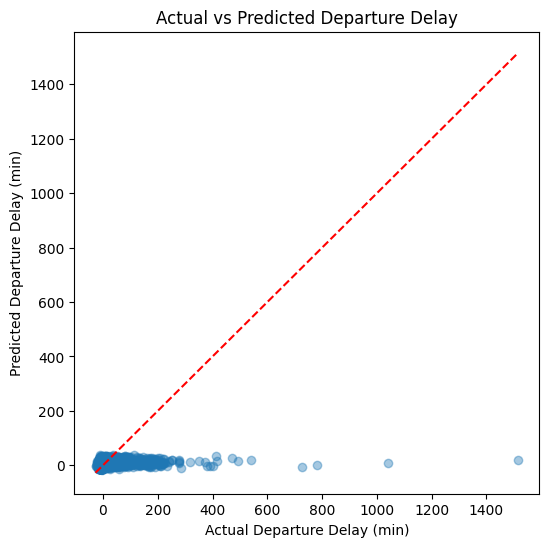

In [12]:
# ============================================
# CELL 10: Plot Predicted vs Actual
# ============================================

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Departure Delay (min)")
plt.ylabel("Predicted Departure Delay (min)")
plt.title("Actual vs Predicted Departure Delay")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Top 15 important features (by absolute coefficient):

DEST_EWR    54.576954
DEST_HNL    47.409289
DEST_MIA    46.588288
DEST_KOA    44.666478
DEST_FLL    44.429501
DEST_LIH    43.475729
DEST_RDM   -43.155443
DEST_PSC   -42.358226
DEST_BOS    42.345519
DEST_MFR   -42.086467
DEST_PDX   -41.941265
DEST_TPA    41.591868
DEST_JFK    41.098985
DEST_RSW    41.009010
DEST_EUG   -40.672387
dtype: float64


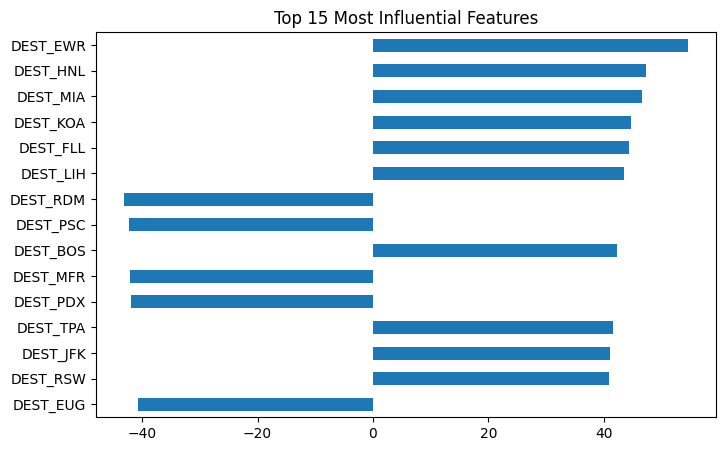

In [13]:
# ============================================
# CELL 11: Analyze feature importance (coefficients)
# ============================================

coefs = pd.Series(model.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)

# Display top 15 features by absolute value
print("Top 15 important features (by absolute coefficient):\n")
print(coefs.head(15))

# Optional: plot
plt.figure(figsize=(8,5))
coefs.head(15).plot(kind='barh')
plt.title("Top 15 Most Influential Features")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# ============================================
# CELL 12: Save model and scaler for future use
# ============================================

import joblib

joblib.dump(model, "linear_model_flight.pkl")
joblib.dump(scaler, "scaler_flight.pkl")

print("Model and scaler saved successfully!")
